In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.express as px
import folium

In [18]:
df = pd.read_csv('MCI_2014_to_2019.csv')

In [19]:
df.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId
0,-8.816401e+06,5.434587e+06,701,GO-20141756319,2014/03/24 00:00:00+00,2014/03/24 00:00:00+00,Commercial,1430,100,Assault,...,83.0,Monday,1,Assault,D42,132,Malvern (132),-79.199081,43.800281,1
1,-8.837252e+06,5.413357e+06,901,GO-20143006885,2014/09/27 00:00:00+00,2014/09/29 00:00:00+00,Other,2120,200,B&E,...,270.0,Saturday,16,Break and Enter,D52,76,Bay Street Corridor (76),-79.386383,43.662472,2
2,-8.862433e+06,5.422276e+06,702,GO-20141756802,2014/03/24 00:00:00+00,2014/03/24 00:00:00+00,Commercial,2120,200,B&E,...,83.0,Monday,6,Break and Enter,D23,1,West Humber-Clairville (1),-79.612595,43.720406,3
3,-8.833104e+06,5.431887e+06,703,GO-20141760570,2014/03/24 00:00:00+00,2014/03/24 00:00:00+00,Apartment,2120,200,B&E,...,83.0,Monday,15,Break and Enter,D33,47,Don Valley Village (47),-79.349121,43.782772,4
4,-8.845311e+06,5.413667e+06,902,GO-20142004859,2014/05/03 00:00:00+00,2014/05/03 00:00:00+00,Commercial,1610,210,Robbery - Business,...,123.0,Saturday,2,Robbery,D11,90,Junction Area (90),-79.458778,43.664490,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206435 entries, 0 to 206434
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   X                    206435 non-null  float64
 1   Y                    206435 non-null  float64
 2   Index_               206435 non-null  int64  
 3   event_unique_id      206435 non-null  object 
 4   occurrencedate       206435 non-null  object 
 5   reporteddate         206435 non-null  object 
 6   premisetype          206435 non-null  object 
 7   ucr_code             206435 non-null  int64  
 8   ucr_ext              206435 non-null  int64  
 9   offence              206435 non-null  object 
 10  reportedyear         206435 non-null  int64  
 11  reportedmonth        206435 non-null  object 
 12  reportedday          206435 non-null  int64  
 13  reporteddayofyear    206435 non-null  int64  
 14  reporteddayofweek    206435 non-null  object 
 15  reportedhour     

In [6]:
df.isnull().sum()

X                       0
Y                       0
Index_                  0
event_unique_id         0
occurrencedate          0
reporteddate            0
premisetype             0
ucr_code                0
ucr_ext                 0
offence                 0
reportedyear            0
reportedmonth           0
reportedday             0
reporteddayofyear       0
reporteddayofweek       0
reportedhour            0
occurrenceyear         59
occurrencemonth        59
occurrenceday          59
occurrencedayofyear    59
occurrencedayofweek    59
occurrencehour          0
MCI                     0
Division                0
Hood_ID                 0
Neighbourhood           0
Long                    0
Lat                     0
ObjectId                0
dtype: int64

In [7]:
df.columns

Index(['X', 'Y', 'Index_', 'event_unique_id', 'occurrencedate', 'reporteddate',
       'premisetype', 'ucr_code', 'ucr_ext', 'offence', 'reportedyear',
       'reportedmonth', 'reportedday', 'reporteddayofyear',
       'reporteddayofweek', 'reportedhour', 'occurrenceyear',
       'occurrencemonth', 'occurrenceday', 'occurrencedayofyear',
       'occurrencedayofweek', 'occurrencehour', 'MCI', 'Division', 'Hood_ID',
       'Neighbourhood', 'Long', 'Lat', 'ObjectId'],
      dtype='object')

In [23]:
df1 = df[['premisetype','offence', 'reportedyear',
       'reportedmonth', 'reportedday', 'reporteddayofyear',
       'reporteddayofweek', 'reportedhour', 'occurrenceyear',
       'occurrencemonth', 'occurrenceday', 'occurrencedayofyear',
       'occurrencedayofweek', 'occurrencehour', 'MCI', 'Division','Neighbourhood', 'Long', 'Lat']]

In [24]:
df1.head()

,premisetype,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Neighbourhood,Long,Lat
0,Commercial,Assault,2014,March,24,83,Monday,3,2014.0,March,24.0,83.0,Monday,1,Assault,D42,Malvern (132),-79.199081,43.800281
1,Other,B&E,2014,September,29,272,Monday,10,2014.0,September,27.0,270.0,Saturday,16,Break and Enter,D52,Bay Street Corridor (76),-79.386383,43.662472
2,Commercial,B&E,2014,March,24,83,Monday,7,2014.0,March,24.0,83.0,Monday,6,Break and Enter,D23,West Humber-Clairville (1),-79.612595,43.720406
3,Apartment,B&E,2014,March,24,83,Monday,23,2014.0,March,24.0,83.0,Monday,15,Break and Enter,D33,Don Valley Village (47),-79.349121,43.782772
4,Commercial,Robbery - Business,2014,May,3,123,Saturday,2,2014.0,May,3.0,123.0,Saturday,2,Robbery,D11,Junction Area (90),-79.458778,43.664490


In [25]:
df1['Neighbourhood'] = df1['Neighbourhood'].apply(lambda x: x.split(' (')[0])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
# type of crime committed based on time of day

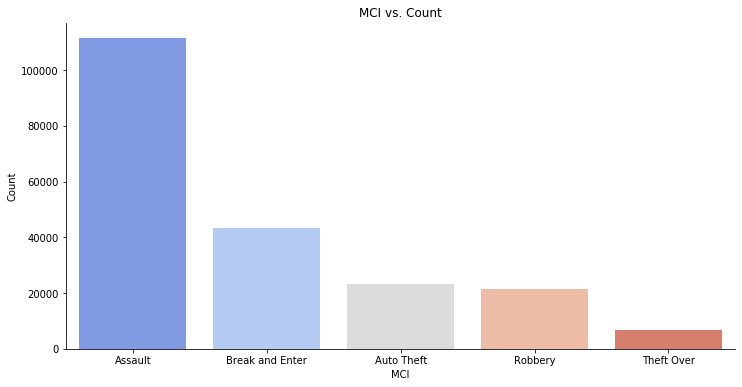

In [14]:
df2 = pd.DataFrame(df1['MCI'].value_counts()).reset_index()
df2.columns = ['MCI','Count']
plt.figure(figsize=(12,6))
sns.barplot(x='MCI',y='Count',data=df2,palette='coolwarm').set_title('MCI vs. Count')
sns.despine()

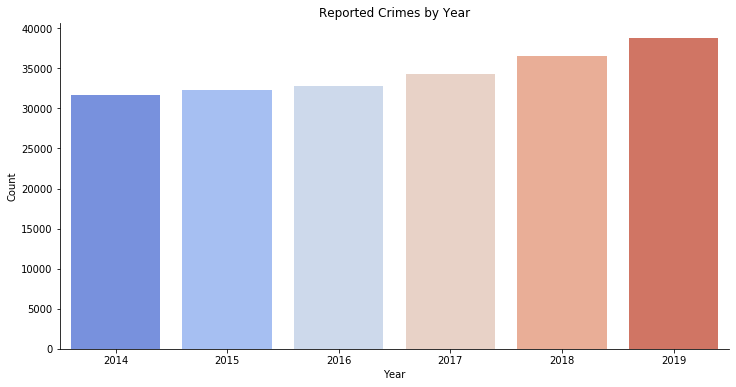

In [14]:
plt.figure(figsize=(12,6))
df4 = df['reportedyear'].value_counts().reset_index()
df4.columns=['Year','Count']
sns.barplot(x='Year',y='Count',data=df4,palette='coolwarm').set_title('Reported Crimes by Year')
sns.despine()

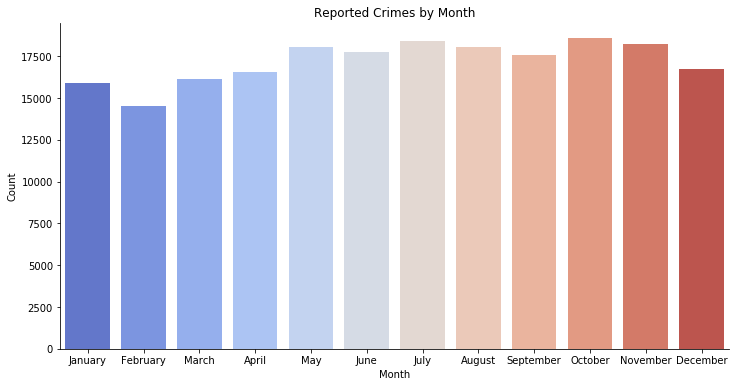

In [15]:
plt.figure(figsize=(12,6))
df4 = df['reportedmonth'].value_counts().reset_index()
df4.columns=['Month','Count']
df4 = df4.reindex([10,11,9,8,4,5,1,3,6,0,2,7])
sns.barplot(x='Month',y='Count',data=df4,palette='coolwarm').set_title('Reported Crimes by Month')
sns.despine()

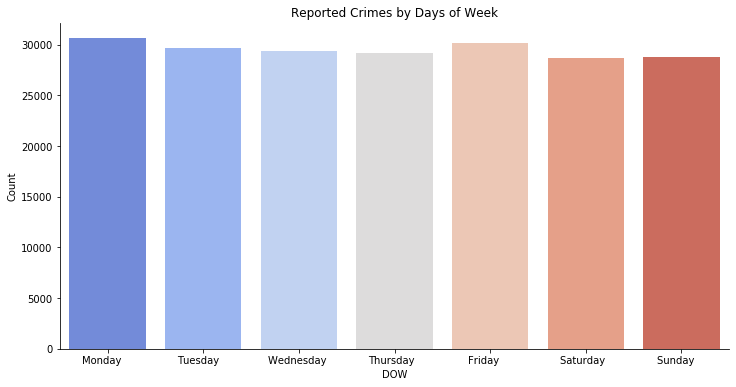

In [16]:
plt.figure(figsize=(12,6))
df5 = df['reporteddayofweek'].value_counts().reset_index()
df5.columns=['DOW','Count']
df5 = df5.reindex([0,2,3,4,1,6,5])
sns.barplot(x='DOW',y='Count',data=df5,palette='coolwarm').set_title('Reported Crimes by Days of Week')
sns.despine()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

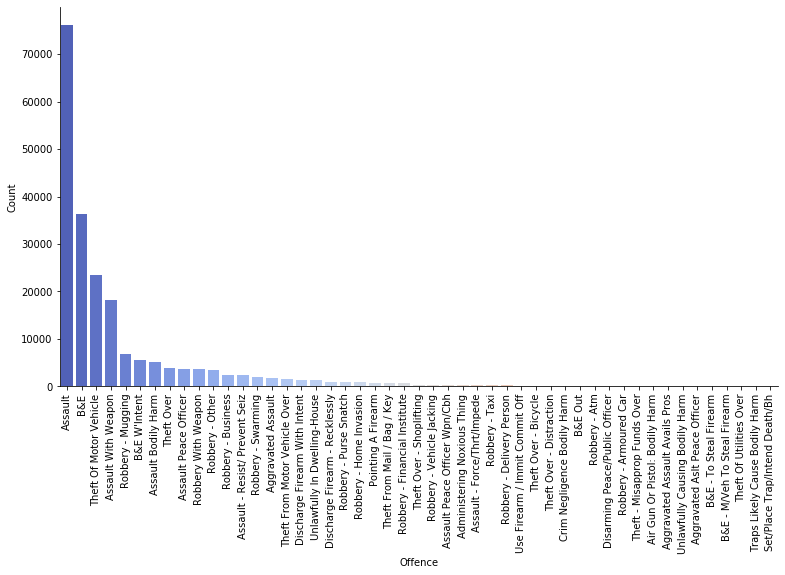

In [17]:
plt.figure(figsize=(12,6))
df3 = df1['offence'].value_counts().reset_index()
df3.columns=['Offence','Count']
sns.barplot(x='Offence',y='Count',data=df3,palette='coolwarm')
sns.despine()
plt.tight_layout()
plt.xticks(rotation=90)

In [31]:
df6 = df1[['Neighbourhood','MCI']]

In [32]:
assault = df6[df6['MCI'] == 'Assault']
BE = df6[df6['MCI']== 'Break and Enter']
robbery = df6[df6['MCI']== 'Robbery']
auto = df6[df6['MCI']== 'Auto Theft']
theft = df6[df6['MCI']== 'Theft Over']

assault_count = pd.DataFrame(assault['Neighbourhood'].value_counts()).reset_index()
assault_count.columns=['Neighbourhood','Assault']

be_count = pd.DataFrame(BE['Neighbourhood'].value_counts()).reset_index()
be_count.columns=['Neighbourhood','B&E']
be_count.drop('Neighbourhood',axis=1,inplace=True)

robbery_count = pd.DataFrame(robbery['Neighbourhood'].value_counts()).reset_index()
robbery_count.columns=['Neighbourhood','Robbery']
robbery_count.drop('Neighbourhood',axis=1,inplace=True)

auto_count = pd.DataFrame(auto['Neighbourhood'].value_counts()).reset_index()
auto_count.columns=['Neighbourhood','Auto Theft']
auto_count.drop('Neighbourhood',axis=1,inplace=True)

theft_count = pd.DataFrame(theft['Neighbourhood'].value_counts()).reset_index()
theft_count.columns=['Neighbourhood','Theft']
theft_count.drop('Neighbourhood',axis=1,inplace=True)

results = pd.concat([assault_count,be_count,robbery_count,auto_count,theft_count],axis=1)

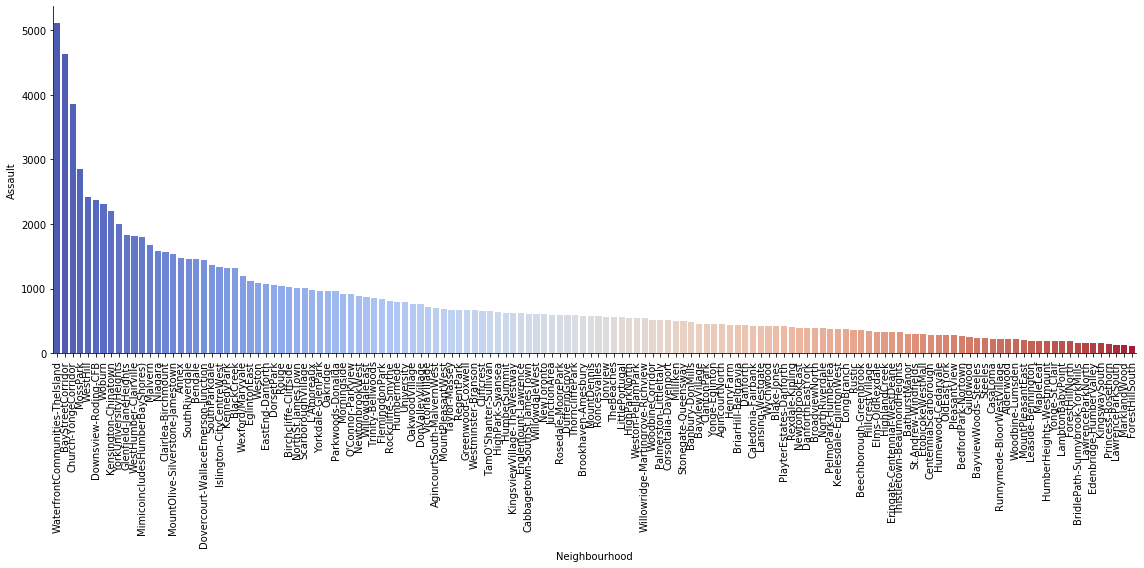

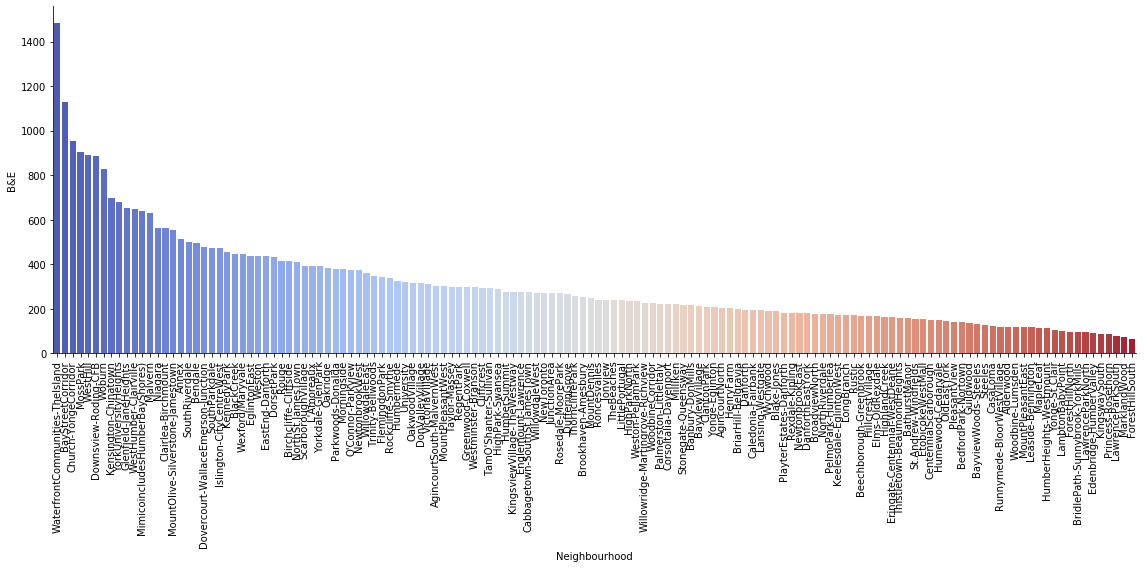

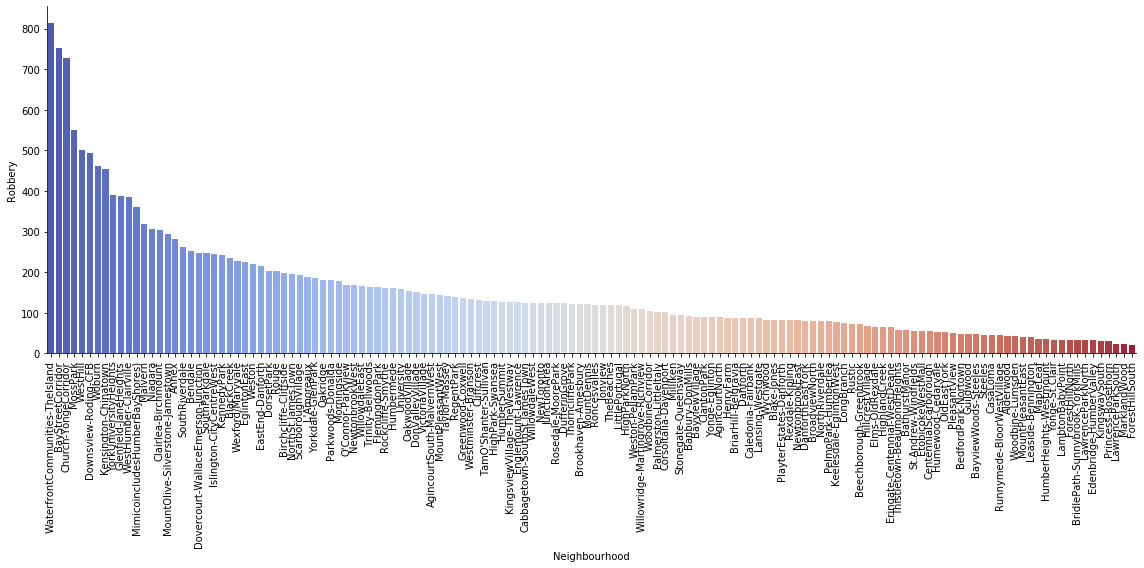

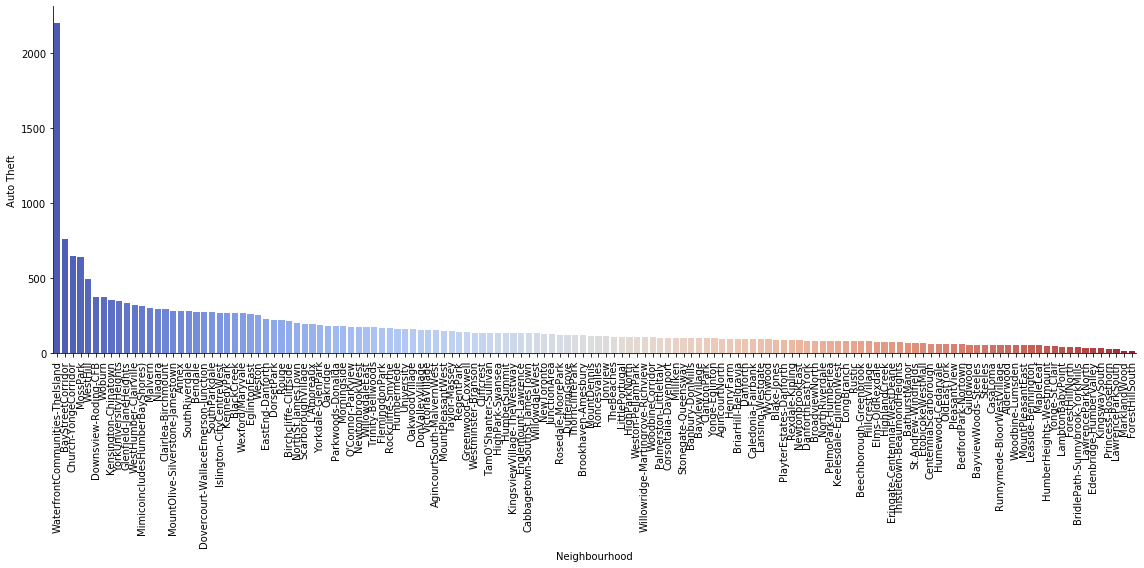

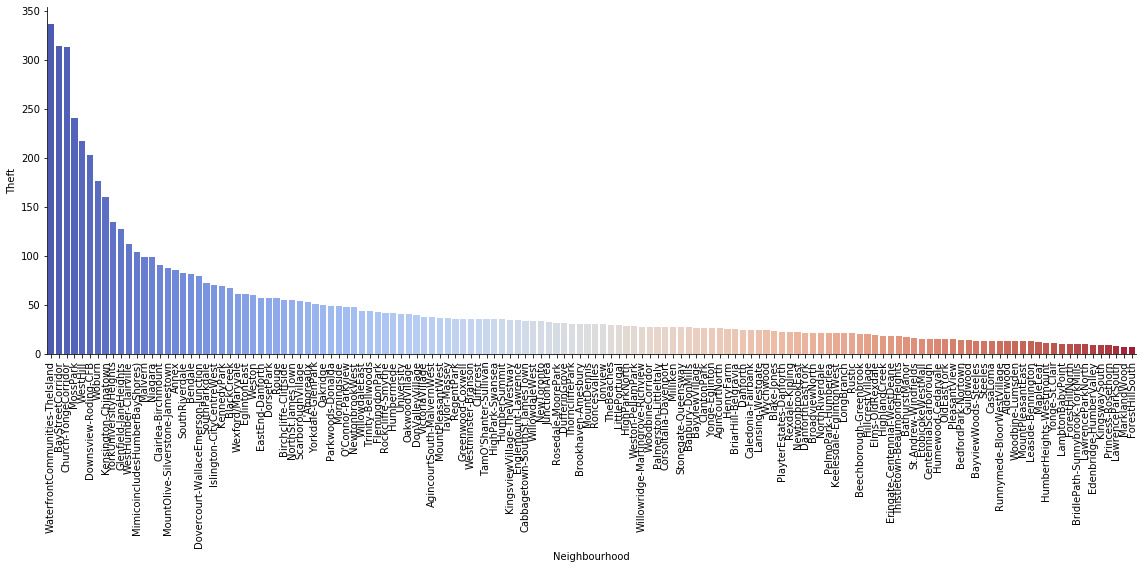

In [33]:
for i in (np.arange(1,6)):
    plt.figure(figsize=(16,8))
    sns.barplot(x='Neighbourhood',y=results.columns[i],data=results,palette='coolwarm')
    plt.xticks(rotation=90)
    sns.despine()
    plt.tight_layout()

# Model Building

In [26]:
# Percent of NaN values
percent = ((df1['occurrenceday'].isnull().sum().sum())/len(df1))*100
print('The percent of NaN values are: {}'.format(percent))

The percent of NaN values are: 0.028580424831060627


In [27]:
# There are 59 records of NaN values in the occurrence section, this accounts to < 1% of the dataset
# Therefore we will just drop the NaN values
df1.dropna(inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
# Feature Engineering same_day_reported
# determining the difference of days between reported and occurence crimes
df1['same_day_reported'] = df1.apply(lambda x: 1 if x['reportedday'] == x['occurrenceday'] else 0,axis=1)
df1['same_month_reported'] = df1.apply(lambda x: 1 if x['reportedmonth'] == x['occurrencemonth'] else 0, axis=1)
df1['same_year_reported'] = df1.apply(lambda x: 1 if x['reportedyear'] == x['occurrenceyear'] else 0, axis=1)
df1['same_dow_reported'] = df1.apply(lambda x: 1 if x['reporteddayofweek'] == x['occurrencedayofweek'] else 0, axis=1)
df1['same_doy_reported'] = df1.apply(lambda x: 1 if x['reporteddayofyear'] == x['occurrencedayofyear'] else 0, axis=1)
df1['same_hour_reported'] = df1.apply(lambda x: 1 if x['reportedhour'] == x['occurrencehour'] else 0, axis=1)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [29]:
# Choosing Relevant columns for our model
df2 = df1[['premisetype', 'reportedyear', 'reportedmonth',
       'reportedday', 'reporteddayofyear', 'reporteddayofweek', 'reportedhour', 'MCI',
       'Division', 'same_day_reported',
       'same_month_reported', 'same_year_reported', 'same_dow_reported',
       'same_hour_reported']]

In [30]:
df1['MCI'].unique()

array(['Assault', 'Break and Enter', 'Robbery', 'Theft Over',
       'Auto Theft'], dtype=object)

In [31]:
# Encoding our label (MCI) with numerical values to feed into our ML model
mci_dict = {'Assault':1,'Break and Enter':2, 'Robbery':3, 'Theft Over':4, 'Auto Theft': 5}

df2['MCI'] = df2['MCI'].map(mci_dict)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
df2['MCI'].value_counts()

1    111373
2     43301
5     23377
3     21541
4      6784
Name: MCI, dtype: int64

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



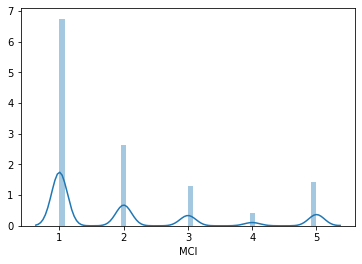

In [114]:
sns.distplot(df2['MCI'])

In [34]:
df3 = pd.get_dummies(df2)

In [35]:
df3.head()

,reportedyear,reportedday,reporteddayofyear,reportedhour,MCI,same_day_reported,same_month_reported,same_year_reported,same_dow_reported,same_hour_reported,...,Division_D32,Division_D33,Division_D41,Division_D42,Division_D43,Division_D51,Division_D52,Division_D53,Division_D54,Division_D55
0,2014,24,83,3,1,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,2014,29,272,10,2,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2014,24,83,7,2,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,24,83,23,2,1,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
4,2014,3,123,2,3,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Encoding our label (MCI) with numerical values to feed into our ML model
mci_dict = {1:'Assault',2:'Break and Enter', 3:'Robbery', 4:'Theft Over', 5:'Auto Theft'}

df3['MCI'] = df3['MCI'].map(mci_dict)

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from collections import Counter

In [65]:
X = df3.drop('MCI',axis=1)
y = df3['MCI'].values

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [61]:
# we will run the model through a standard Logistic Regression without any tuning to determine how the model performs 
# with the raw dataset
logreg = LogisticRegression()

In [68]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
prediction = logreg.predict(X_test)

In [70]:
print(classification_report(y_test,prediction))

                 precision    recall  f1-score   support

        Assault       0.66      0.87      0.75     36646
     Auto Theft       0.53      0.43      0.47      7664
Break and Enter       0.52      0.48      0.50     14380
        Robbery       0.00      0.00      0.00      7153
     Theft Over       0.22      0.00      0.01      2262

    avg / total       0.53      0.62      0.56     68105



C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



- As you can see from the classification report, Robbery and Theft Over have a very poor recall and f1-score.
- This may be due to the fact of an imbalanced dataset. We can see from the distribution plot (histogram) above that Robbery and Theft Over have very low counts.
- As a result, the imbalanced dataset may have contributed to the poor scores for Robbery and Theft Over
- In order to resolve the issue, we will need to use a Resampling technique that will allow us to generate more points to balance out the data set

# Handling Imbalance Dataset

In [73]:
# Implementing Oversampling for Handling Imbalanced 
os =  RandomOverSampler(ratio=1)
sm = SMOTETomek(ratio=1)

In [75]:
# RandomOverSampler
X_train_ros, y_train_ros = os.fit_sample(X, y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning:

Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.



In [76]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_ros)))

Original dataset shape Counter({'Assault': 111373, 'Break and Enter': 43301, 'Auto Theft': 23377, 'Robbery': 21541, 'Theft Over': 6784})
Resampled dataset shape Counter({'Assault': 111373, 'Break and Enter': 111373, 'Robbery': 111373, 'Theft Over': 111373, 'Auto Theft': 111373})


In [77]:
logreg.fit(X_train_ros,y_train_ros)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
pred = logreg.predict(X_test)

In [80]:
print(classification_report(y_test,pred))

                 precision    recall  f1-score   support

        Assault       0.80      0.40      0.53     36646
     Auto Theft       0.48      0.57      0.52      7664
Break and Enter       0.48      0.53      0.50     14380
        Robbery       0.25      0.56      0.34      7153
     Theft Over       0.11      0.42      0.18      2262

    avg / total       0.61      0.46      0.49     68105



In [82]:
# Pipeline Creation
## 1. Data Preprocessing, Standard Scaler
## 2. Apply Classifier

pipeline_lr = Pipeline([('scaler1', StandardScaler()),
                        ('lr_classifier',LogisticRegression())])
pipeline_dt = Pipeline([('scaler2',StandardScaler()),
                        ('dt_classifier',DecisionTreeClassifier())])
pipeline_randomforest = Pipeline([('scaler3', StandardScaler()),
                                  ('rf_classifier', RandomForestClassifier())])
#pipeline_knn = Pipeline([('scaler4',StandardScaler()),
                         #('knn_classifier', KNeighborsClassifier())])

In [83]:
# List of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest]

best_accuracy =0
best_classifier = 0
best_pipeline=''

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0:'Logistic Regression', 1:'Decision Tree',2:'Random Forest'}

In [84]:
for pipe in pipelines:
    pipe.fit(X_train_ros, y_train_ros)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [85]:
for i, model in enumerate(pipelines):
    print('{} Test Accuracy: {}'.format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.4609500036708024
Decision Tree Test Accuracy: 0.9795903384479847
Random Forest Test Accuracy: 0.975244108362088
